In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Q2

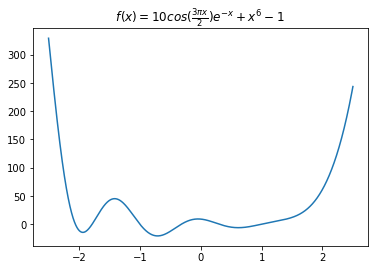

             0         1         2         3         4        5         6  \
x    -2.059701 -2.059700 -1.783822 -1.783821 -1.000001 -1.00000 -0.317895   
f(x)  0.000211 -0.000039 -0.000049  0.000112  0.000094 -0.00004 -0.000048   

             7         8         9        10        11  
x    -0.317894  0.304494  0.304495  1.000000  1.000001  
f(x)  0.000015  0.000004 -0.000032 -0.000007  0.000016  


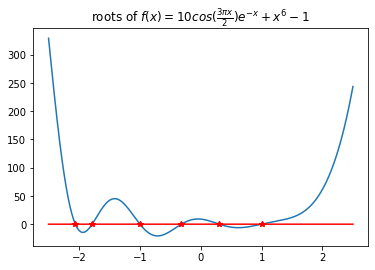

In [2]:
# 2-(a)
# select 5 millions points to plot
N=5000000
x=np.linspace(-2.5,2.5,N)
# define function f(x)=10cos(3pix/2)exp(-x)+x^6-1
f=10*np.cos(3*np.pi*x/2)*np.exp(-x)+x**6-1
# plot the function
plt.plot(x,f)
plt.title(r' $f(x)=10cos( \frac{3\pi x}{2})e^{-x}+x^{6}-1$  ')
plt.show()
# find roots
root_x=[]
root_y=[]
for i in range(N-1):
    # find where does the sign change
    if f[i+1]*f[i]<=0:
        root_x.append(x[i])
        root_y.append(f[i])
        root_x.append(x[i+1])
        root_y.append(f[i+1])
root=np.array([root_x,root_y])
# display where does the sign change
print(pd.DataFrame(root,index=['x','f(x)']))
# plot where are the roots
plt.plot(x,f)
plt.title(r'roots of $f(x)=10cos( \frac{3\pi x}{2})e^{-x}+x^6-1$ ')
# plot f(x)=0 to check how many roots exist
plt.plot(x,np.zeros(N),'r')
plt.plot(root[0],root[1],'r*')
plt.show()

          xl     f(xl)        xr     f(xr)        xu     f(xu)        ea
0   0.000000  9.000005  0.250000  1.980602  0.500000 -5.273188  1.000000
1   0.250000  9.000005  0.375000  1.980602  0.500000 -5.273188  0.333333
2   0.250000  1.980602  0.312500 -2.338041  0.375000 -5.273188 -0.200000
3   0.250000  1.980602  0.281250 -0.281945  0.312500 -2.338041 -0.111111
4   0.281250  1.980602  0.296875  0.834622  0.312500 -0.281945  0.052632
5   0.296875  0.834622  0.304688  0.271181  0.312500 -0.281945  0.025641
6   0.296875  0.271181  0.300781 -0.006866  0.304688 -0.281945 -0.012987
7   0.300781  0.271181  0.302734  0.131795  0.304688 -0.006866  0.006452
8   0.302734  0.131795  0.303711  0.062375  0.304688 -0.006866  0.003215
9   0.303711  0.062375  0.304199  0.027750  0.304688 -0.006866  0.001605
10  0.304199  0.027750  0.304443  0.010418  0.304688 -0.006866  0.000802
11  0.304443  0.010418  0.304565  0.001775  0.304688 -0.006866  0.000401
12  0.304443  0.001775  0.304504 -0.002546  0.30456

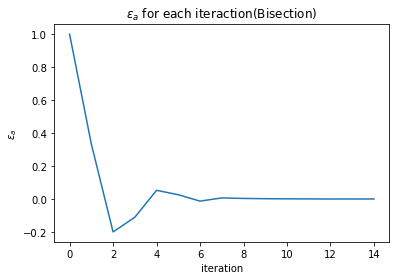

          xl     f(xl)        xr     f(xr)        xu     f(xu)        ea
0   0.000000  9.000005  0.315277 -0.378957  0.500000 -5.273188  1.000000
1   0.000000  9.000005  0.198799  3.855695  0.315277 -5.273188 -0.585909
2   0.198799  9.000005  0.310570 -0.214312  0.315277 -0.378957  0.359892
3   0.198799  3.855695  0.300568  0.139412  0.310570 -0.378957 -0.033278
4   0.300568  3.855695  0.310044 -0.195800  0.310570 -0.214312  0.030563
5   0.300568  0.139412  0.304302  0.006769  0.310044 -0.214312 -0.018866
6   0.304302  0.139412  0.306690 -0.077690  0.310044 -0.195800  0.007785
7   0.304302  0.006769  0.304382  0.003935  0.306690 -0.195800 -0.007582
8   0.304382  0.006769  0.304567 -0.002617  0.306690 -0.077690  0.000607
9   0.304382  0.003935  0.304391  0.003617  0.304567 -0.077690 -0.000578
10  0.304391  0.003935  0.304497 -0.000102  0.304567 -0.002617  0.000347
11  0.304391  0.003617  0.304452  0.001456  0.304497 -0.002617 -0.000146
12  0.304452  0.003617  0.304496 -0.000067  0.30449

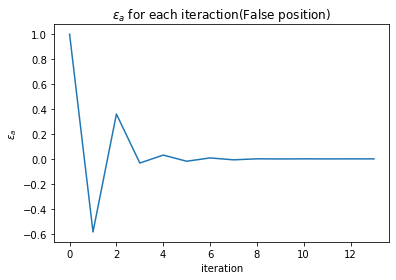

In [3]:
# 2-(b)
# Because data is discrete,we can only approximate f(x)
def approx(p):
    return f[np.argmin(abs(p-x))]
# use bisection method to find roots
def bisection(xl,xu,es=1e-4):
    # determine the initial condition
    xr=(xu+xl)/2
    ea=1
    data=[]
    while abs(ea)>es:
        f_xl=approx(xl)
        f_xr=approx(xr)
        f_xu=approx(xu)
        if len(data)==0:
            data=np.array([xl,f_xl,xr,f_xr,xu,f_xu,ea])
        if f_xl*f_xu>0:
            raise 'there is no any root'
        elif f_xl*f_xr>0:
            xl=xr
            xr=(xu+xl)/2
            ea=(xr-xl)/xr
        else:
            xu=xr
            xr=(xu+xl)/2
            ea=(xr-xu)/xr
        data=np.vstack((data,np.array([xl,f_xl,xr,f_xr,xu,f_xu,ea])))
    print(pd.DataFrame(data,columns=['xl','f(xl)','xr','f(xr)','xu','f(xu)','ea']))
    plt.plot(data[:,6])
    plt.xlabel('iteration')
    plt.ylabel('$\epsilon_{a}$')
    plt.title('$\epsilon_{a}$ for each iteraction(Bisection)')
    plt.show()
# use false position method to find roots
def falseposition(xl,xu,es=1e-4):
    ea=1
    data=[]
    while abs(ea)>es:
        f_xl=approx(xl)
        f_xu=approx(xu)
        if len(data)==0:
            xr=xu-f_xu*(xu-xl)/(f_xu-f_xl)
            f_xr=approx(xr)
            data=np.array([xl,f_xl,xr,f_xr,xu,f_xu,ea])
        if f_xl*f_xu>0:
            raise 'there is no any root'
        elif f_xl*f_xr>0:
            xl=xr
            xr=xu-f_xu*(xu-xl)/(f_xu-f_xl)
            ea=(xr-xl)/xr
        else:
            xu=xr
            xr=xu-f_xu*(xu-xl)/(f_xu-f_xl)
            ea=(xr-xu)/xr
        f_xr=approx(xr)
        data=np.vstack((data,np.array([xl,f_xl,xr,f_xr,xu,f_xu,ea])))
    print(pd.DataFrame(data,columns=['xl','f(xl)','xr','f(xr)','xu','f(xu)','ea']))
    plt.plot(data[:,6])
    plt.xlabel('iteration')
    plt.ylabel('$\epsilon_{a}$')
    plt.title('$\epsilon_{a}$ for each iteraction(False position)')
    plt.show()
# bracket    
bisection(0,0.5)
falseposition(0,0.5)

          xl     f(xl)        xr     f(xr)        xu      f(xu)        ea
0   0.500000 -5.273188  1.250000  5.461651  2.000000  61.646628  1.000000
1   0.500000 -5.273188  0.875000  5.461651  1.250000  61.646628 -0.428571
2   0.875000 -5.273188  1.062500 -2.867173  1.250000   5.461651  0.176471
3   0.875000 -2.867173  0.968750  1.441902  1.062500   5.461651 -0.096774
4   0.968750 -2.867173  1.015625 -0.730381  1.062500   1.441902  0.046154
5   0.968750 -0.730381  0.992188  0.363916  1.015625   1.441902 -0.023622
6   0.992188 -0.730381  1.003906 -0.182433  1.015625   0.363916  0.011673
7   0.992188 -0.182433  0.998047  0.091129  1.003906   0.363916 -0.005871
8   0.998047 -0.182433  1.000977 -0.045591  1.003906   0.091129  0.002927
9   0.998047 -0.045591  0.999512  0.022790  1.000977   0.091129 -0.001466
10  0.999512 -0.045591  1.000244 -0.011395  1.000977   0.022790  0.000732
11  0.999512 -0.011395  0.999878  0.005687  1.000244   0.022790 -0.000366
12  0.999878 -0.011395  1.000061 -0.00

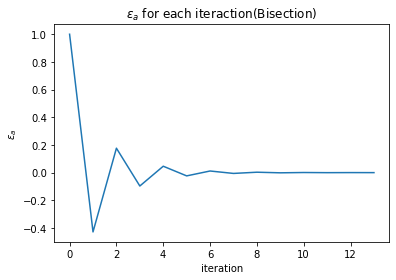

          xl     f(xl)        xr     f(xr)        xu      f(xu)        ea
0   0.500000 -5.273188  0.618198 -6.193369  2.000000  61.646628  1.000000
1   0.618198 -5.273188  0.727082 -5.490881  2.000000  61.646628  0.149755
2   0.727082 -6.193369  0.843291 -3.536903  2.000000  61.646628  0.137805
3   0.843291 -5.490881  0.937894 -1.448726  2.000000  61.646628  0.100867
4   0.937894 -3.536903  0.995524 -0.104502  2.000000  61.646628  0.057890
5   0.995524 -1.448726  1.018588  0.432735  2.000000  61.646628  0.022643
6   0.995524 -0.104502  0.995563 -0.103568  1.018588  61.646628 -0.023127
7   0.995563 -0.104502  1.000042  0.000973  1.018588   0.432735  0.004479
8   0.995563 -0.103568  0.996428 -0.083391  1.000042   0.432735 -0.003627
9   0.996428 -0.103568  1.000008  0.000203  1.000042   0.000973  0.003580
10  0.996428 -0.083391  0.999967 -0.000777  1.000008   0.000973 -0.000041


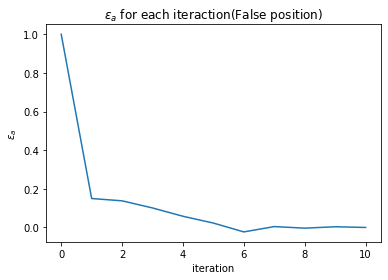

In [4]:
# 2-(c) change the bracket and redo
bisection(0.5,2)
falseposition(0.5,2)

## Q3

In [5]:
class Simulation:
    #set the initial condition according to 3-(d)
    def __init__(self,theta,S_minus,t,T1,T2):
        self.S=S_minus
        self.theta=theta
        self.t=t
        self.T1=T1
        self.T2=T2
    #3-(a) create a matrix such that rotate a vector around the x-axis by an angle.
    def rotate_x(self):
        R=np.array([[1,0,0],[0,np.cos(self.theta),-np.sin(self.theta)],[0,np.sin(self.theta),np.cos(self.theta)]])
        self.S=R.dot(self.S)
    #3-(b) modulation
    def modulate(self):
        D1=np.array([[np.exp(-self.t/self.T2),0,0],[0,np.exp(-self.t/self.T2),0],[0,0,np.exp(-self.t/self.T1)]])
        D2=np.array([[0],[0],[1-np.exp(-self.t/self.T1)]])
        self.S=D1.dot(self.S)+D2
    #3-(c) clean up the x- and y- components
    def cleanup(self):
        self.S=np.array([[0,0,0],[0,0,0],[0,0,1]]).dot(self.S)
    #3-(d)
    def projection(self):
        Sxy=np.sqrt(np.square(self.S[0])+np.square(self.S[1]))
        return Sxy


             0         1
x     0.528845  5.691382
f(x)  0.089464  0.077551


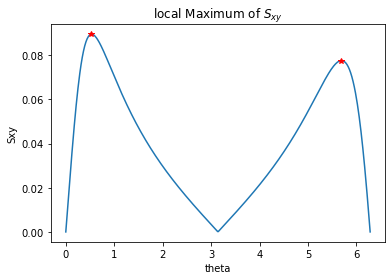

In [6]:
#3-(e)
t=250
T1=1500
T2=200
N=500
theta_space=np.linspace(0,2*np.pi,N)
S=np.array([[0],[0],[1]])
Sxy=np.zeros(N)
for i,theta in enumerate(theta_space):
    case=Simulation(theta,S,t,T1,T2)
    case.rotate_x()
    case.modulate()
    Sxy[i]=case.projection()
    case.cleanup()
    S=case.S

# find theta_opt
root_x=[]
root_y=[]
for i in range(1,N-1,1):
    # find where does the max value among 3-nearest neighbors.
    if Sxy[i-1]<Sxy[i] and Sxy[i]>Sxy[i+1]:
        root_x.append(theta_space[i])
        root_y.append(Sxy[i])
root=np.array([root_x,root_y])
# display where does the sign change
print(pd.DataFrame(root,index=['x','f(x)']))
# plot where are the roots
plt.plot(theta_space,Sxy)
plt.title('local Maximum of $S_{xy}$')
plt.plot(root[0],root[1],'r*')
plt.xlabel('theta')
plt.ylabel('Sxy')
plt.show()


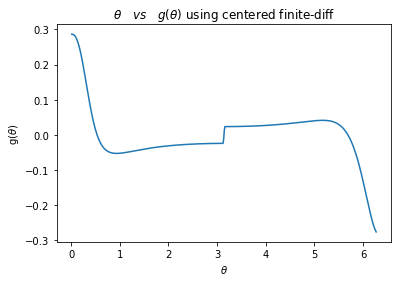

                    0         1         2         3         4         5
theta        0.528845  0.541437  3.135297  3.147888  5.678791  5.691382
$g(\theta)$  0.001952 -0.003100 -0.011912  0.011909  0.002894 -0.000028


In [7]:
#3-(f),let h=0.001 and neglect O(h^2),then g(theta)=(Sxy(i+1)-Sxy(i))/2h where i is the i-th term of Sxy
h=theta_space[1]-theta_space[0]
#create an array to store theta and g(theta)
g=np.zeros((2,N-2))
for i in range(1,N-1,1):
    g[0][i-1]=theta_space[i]
    #use centered finite-diff. to approximate first derivative
    g[1][i-1]=(Sxy[i+1]-Sxy[i-1])/(2*h)
plt.plot(g[0],g[1])
plt.xlabel(r'$\theta $')
plt.ylabel(r'g($\theta$)')
plt.title(r'$ \theta\quad vs\quad g(\theta) $ using centered finite-diff')
plt.show()
#
root=[]
for i in range(N-3):
    if g[1][i]*g[1][i+1]<0:
        if len(root)==0:
            root=np.expand_dims(g[:,i],axis=1)
        else:
            root=root=np.hstack((root,np.expand_dims(g[:,i],axis=1)))
        root=np.hstack((root,np.expand_dims(g[:,i+1],axis=1)))
print(pd.DataFrame(root,index=['theta','$g(\theta)$']))



In [8]:
#3-(g)
class GoldenSection:
    def __init__(self,xl,xu,es=1e-3):
        self.xl=xl
        self.xu=xu
        self.es=es
        self.ea=1
        self.data=[]
    def approximate(self,x):
        y=Sxy[np.argmin(abs(x-theta_space))]
        return y
    def update(self):
        l=self.xu-self.xl
        phi=(1+np.sqrt(5))/2
        d=(phi-1)*l
        self.x1=self.xl+d
        self.x2=self.xu-d
        self.f_x1=self.approximate(self.x1)
        self.f_x2=self.approximate(self.x2)
        if len(self.data)==0:
            self.data=np.array([self.xl,self.x2,self.f_x2,self.x1,self.f_x1,self.xu,self.ea])
        else:
            self.data=np.vstack((self.data,np.array([self.xl,self.x2,self.f_x2,self.x1,self.f_x1,self.xu,self.ea])))
        if self.f_x1<self.f_x2:
            self.xu=self.x1
            xopt=self.x2
        else:
            self.xl=self.x2
            xopt=self.x1
        self.ea=(2-phi)*abs(self.xu-self.xl)/xopt
    def iteration(self):
        while abs(self.ea)>self.es:
            self.update()
        self.update()
        print(pd.DataFrame(self.data,columns=['xl','x2','f(x2)','x1','f(x1)','xu','ea']))

interval=GoldenSection(0.1,1.5)
interval.iteration()

          xl        x2     f(x2)        x1     f(x1)        xu        ea
0   0.100000  0.634752  0.087915  0.965248  0.072017  1.500000  1.000000
1   0.100000  0.430495  0.086751  0.634752  0.087915  0.965248  0.520668
2   0.430495  0.634752  0.087915  0.760990  0.082937  0.965248  0.321790
3   0.430495  0.556733  0.089386  0.634752  0.087915  0.760990  0.198877
4   0.430495  0.508514  0.089278  0.556733  0.089386  0.634752  0.140138
5   0.508514  0.556733  0.089386  0.586534  0.088852  0.634752  0.086610
6   0.508514  0.538315  0.089456  0.556733  0.089386  0.586534  0.053528
7   0.508514  0.526932  0.089464  0.538315  0.089456  0.556733  0.034214
8   0.508514  0.519897  0.089407  0.526932  0.089464  0.538315  0.021602
9   0.519897  0.526932  0.089464  0.531280  0.089464  0.538315  0.013351
10  0.526932  0.531280  0.089464  0.533967  0.089464  0.538315  0.008184
11  0.531280  0.533967  0.089464  0.535628  0.089456  0.538315  0.005032
12  0.531280  0.532941  0.089464  0.533967  0.08946

In [9]:
#3-(h)
print(np.arccos(np.exp(-t/T1)))

0.5614542743438808
